In [2]:
# Algunas bibliotecas que ocuparemos
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from numpy.linalg import *
import pylab
from sklearn import datasets


![](iris.png)

In [8]:
iris = datasets.load_iris()
data = iris.data[:100]
target = iris.target[:100]
data = (data - data.min(axis=0))/(data.max(axis=0)-data.min(axis=0))
P =len(data)


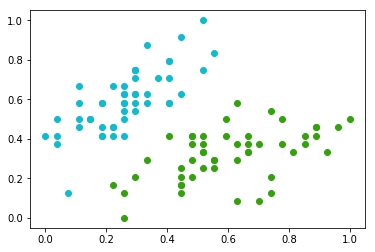

In [16]:
colors = "bgrcmykw"
for i in range(2):
    points = data[target==i]
    plt.plot(points[:,0], points[:,1], 'o', c=np.random.rand(3))
    
plt.show()

In [23]:
def compute_mu_sigma(z, J):
    mu, idx = kmeans2(z, J)
    sigma = np.zeros(J)
    for j in range(J):
        delta = np.sort(norm(mu[j]- mu[:], axis = 1))
        sigma[j] = (delta[1] + delta[2])/2.0
    return mu, sigma

In [25]:
J = 5
mu, sigma = compute_mu_sigma(data, J)

print mu, sigma

[[0.54814815 0.30208333 0.78170732 0.69705882]
 [0.39651416 0.75       0.12625538 0.10380623]
 [0.78148148 0.41458333 0.8902439  0.81176471]
 [0.37037037 0.17083333 0.63170732 0.58823529]
 [0.19191919 0.51515152 0.10569106 0.07664884]] [0.29588866 0.61116028 0.44547174 0.43798221 0.5716371 ]


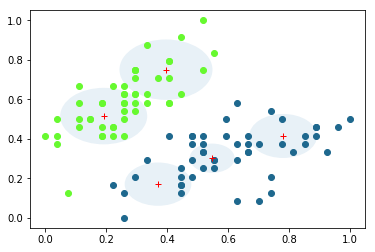

In [29]:
axes = plt.axes()
for i in range(2):
    points = data[target==i]
    plt.plot(points[:,0], points[:,1], 'o', c=np.random.rand(3))
    
for j in range(J):
    plt.plot(mu[j,0], mu[j,1], '+', c='r')
    circle2 = pylab.Circle(mu[j], radius = sigma[j]*0.25, alpha = .1)
    axes.add_patch(circle2)
    
plt.show()

In [39]:
J= 10

mu, sigma = compute_mu_sigma(data, J)

def rbf(z, t, mu, sigma, w = None):
    P = len(z)
    J = len(sigma)
    phi = np.ones((P,J+1))

    for p in range(P):
        for j in range(J):
            phi[p,j] = np.e** (-np.abs(np.sum(z[p]-mu[j])))/ (2.0*sigma[j]*sigma[j])
    if w is None:
        w = np.dot(np.dot(pinv(np.dot(phi.T, phi)), phi.T), t)
    o  = np.dot(phi,w)
    o[o >= 0.5] = 1
    o[o < 0.5] = 0
    ecm = np.sum((o-t)*(o-t)) / P
    return o, w, ecm

idx = np.random.permutation(P)
data_training = data[idx[:80]]
target_training = target[idx[:80]]
data_testing = data[idx[80:]]
target_testing = target[idx[80:]]


o,w,ecm = rbf(data_training,target_training, mu, sigma)
print np.sum(np.abs((o-target_training)))

o,_,ecm = rbf(data_testing,target_testing, mu, sigma, w)
print np.sum(np.abs((o-target_testing)))


print ecm
    
            

4.0
0.0
0.0
